<a href="https://colab.research.google.com/github/AvaPodrazhansky/Jevarah-Vision/blob/master/MachineLearningModels/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#imports for keras
%tensorflow_version 1.x
import keras
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [0]:
from numpy import array
from numpy import argmax
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

In [0]:
train_path = '/content/drive/My Drive/GEN_DATA_TRAIN_TEST_VAL_unziped/GEN_DATA_TRAIN_TEST_VAL/train'
test_path = '/content/drive/My Drive/GEN_DATA_TRAIN_TEST_VAL_unziped/GEN_DATA_TRAIN_TEST_VAL/test'
valid_path = '/content/drive/My Drive/GEN_DATA_TRAIN_TEST_VAL_unziped/GEN_DATA_TRAIN_TEST_VAL/valid'

In [192]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['nevus','basal_cell_carcinoma','vascular_lesion'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=['nevus','basal_cell_carcinoma','vascular_lesion'],batch_size=119)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),classes=['nevus','basal_cell_carcinoma','vascular_lesion'],batch_size=10)

Found 950 images belonging to 3 classes.
Found 119 images belonging to 3 classes.
Found 119 images belonging to 3 classes.


In [0]:
imgs, labels = next(train_batches)

In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


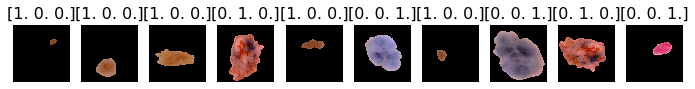

In [17]:
plots(imgs, titles=labels)

In [18]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=3, activation="softmax"))




Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=10,generator=train_batches, validation_data= valid_batches, validation_steps=2,epochs=100,callbacks=[checkpoint,early])


Epoch 1/100
10/10 [==============================] - 51s 5s/step - loss: 723.0998 - accuracy: 0.3300 - val_loss: 1.5876 - val_accuracy: 0.3500
Epoch 2/100


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10/10 [==============================] - 54s 5s/step - loss: 1.0957 - accuracy: 0.3900 - val_loss: 1.1332 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 56s 6s/step - loss: 1.0026 - accuracy: 0.5300 - val_loss: 0.9141 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - 55s 5s/step - loss: 1.1069 - accuracy: 0.3900 - val_loss: 1.3912 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 57s 6s/step - loss: 1.1039 - accuracy: 0.3300 - val_loss: 0.9713 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 55s 5s/step - loss: 1.0846 - accuracy: 0.3600 - val_loss: 1.1071 - val_accuracy: 0.4737
Epoch 7/100
10/10 [==============================] - 54s 5s/step - loss: 1.0768 - accuracy: 0.3900 - val_loss: 1.0716 - val_accuracy: 0.3500
Epoch 8/100
10/10 [==============================] - 57s 6s/step - loss: 1.0709 - accuracy: 0.3500 - val_loss: 1.0636 - val_accuracy: 0.3000
Epoch 9/100
10/10 [======

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


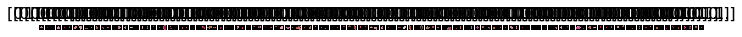

In [193]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [194]:
# test_labels = test_labels[:,0]
test_labels

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0

In [195]:
predictions = model.predict_generator(test_batches,steps=1,verbose=1)

1/1 [==============================] - 3s 3s/step


In [196]:
print(predictions)

[[2.26807836e-02 9.23871160e-01 5.34479953e-02]
 [5.01930629e-07 5.42070530e-02 9.45792496e-01]
 [9.90655124e-01 9.32407938e-03 2.07855646e-05]
 [1.08377180e-14 8.01933056e-04 9.99198020e-01]
 [3.93923492e-17 7.56819354e-05 9.99924302e-01]
 [2.02671097e-28 3.25306466e-08 1.00000000e+00]
 [2.39077806e-02 9.20234859e-01 5.58573715e-02]
 [1.57341640e-02 9.13651705e-01 7.06140921e-02]
 [9.90656435e-01 9.32281092e-03 2.07811318e-05]
 [1.07330374e-17 4.91632545e-06 9.99995112e-01]
 [2.11649552e-01 7.74662137e-01 1.36883482e-02]
 [1.68464263e-19 3.18957937e-05 9.99968052e-01]
 [9.90651846e-01 9.32736136e-03 2.07959856e-05]
 [9.90656078e-01 9.32318997e-03 2.07820758e-05]
 [5.04598545e-04 4.45805371e-01 5.53690016e-01]
 [2.34927647e-02 9.22997653e-01 5.35094701e-02]
 [4.36461605e-02 9.22999084e-01 3.33547406e-02]
 [1.04191176e-05 7.41610304e-02 9.25828576e-01]
 [3.77396904e-02 9.27298844e-01 3.49614248e-02]
 [9.90656495e-01 9.32272803e-03 2.07787161e-05]
 [9.90630686e-01 9.34839156e-03 2.088340

In [0]:
from itertools import chain


def numpyTo1D(arr):
  tDnmpy = arr
  tDlist = tDnmpy.tolist()
  temp = []
  tempkey = 0
  count = 0
  tdict = dict()
  for list1 in tDlist:
    for elements in list1:
        tdict[count] = elements
        tempt = count +1
        count = tempt
    count = 0
    tempkey = max(tdict, key=tdict.get)
    temp.append(tempkey)
  return temp



In [0]:
def floatNumpyTo1D(arr1):
  tDnmpy = arr1
  tDlist = tDnmpy.tolist()
  #print(tDlist)
  temp = []
  count = 0
  for parts in tDlist:
    for elements in parts:
      if count == 0 and elements == 1.0:
        temp.append(0)
        tempt = count +1
        count = tempt
      elif count == 1 and elements == 1.0:
        temp.append(1)
        tempt = count +1
        count = tempt
      elif count == 2 and elements == 1.0:
        temp.append(2)
        count = 0
  return temp

In [199]:
oneDpreds = numpyTo1D(predictions)
print(oneDpreds)

[1, 2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2]


In [200]:
oneDtest = floatNumpyTo1D(test_labels)
print(oneDtest)

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1]


In [0]:
#f1 score calculator
def f1calc(preds, test):
  ztp = 0
  zfp = 0
  zfn = 0
  zprec = 0
  zrec = 0

  otp = 0
  ofp = 0
  ofn = 0 
  oprec = 0
  orec = 0

  ttp = 0 
  tfp = 0 
  tfn = 0
  tprec = 0
  trec = 0

  length = len(preds)
  for i in range(length):
    #false positive check 
    if preds[i] != test[i]:
      #0 class false pos
      if preds[i] == 0:
        temp = zfp + 1
        zfp = temp
      #1 class false pos
      elif preds[i] == 1:
        temp = ofp + 1
        ofp = temp
      #2 class false pos
      elif preds[i] == 2:
        temp = tfp + 1
        tfp = temp

    #true positive and false negative check
    if test[i] == 0:
      # 0 class true pos
      if test[i] == preds[i]:
        temp = ztp + 1
        ztp = temp
      #0 class false neg
      else:
        temp = zfn + 1
        zfn = temp
    elif test[i] == 1:
      #1 class true pos
      if test[i] == preds[i]:
        temp = otp + 1
        otp = temp
      #1 class false neg
      else:
        temp = ofn + 1
        ofn = temp
    elif test[i] == 2:
      #2 class true pos
      if test[i] == preds[i]:
        temp = ttp + 1
        ttp = temp
      #1 class false neg
      else:
        temp = tfn + 1
        tfn = temp

  #calculate individual class precision (true pos)/(true pos + false pos)
  zprec = ztp/(ztp+zfp)
  oprec = otp/(otp+ofp)
  tprec = ttp/(ttp+tfp)
  precision = (zprec +oprec + tprec)/3

  #calculate individual recall (true pos)/(true pos + false neg)
  zrec = ztp/(ztp+zfn)
  orec = otp/(otp+ofn)
  trec = ttp/(ttp+tfn)
  recall = (zrec +orec + trec)/3

  return (2 * (precision * recall) / (precision + recall))

In [202]:
# #metrics
# from sklearn.metrics import f1_score

# f1 = f1_score(oneDpreds, oneDtest)
# print('F1 score: %f' % f1)
f1 = f1calc(oneDpreds, oneDtest)
print('F1 score: %f' % f1)

F1 score: 0.412367


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 0 3]
 [0 2 0]
 [0 0 1]]


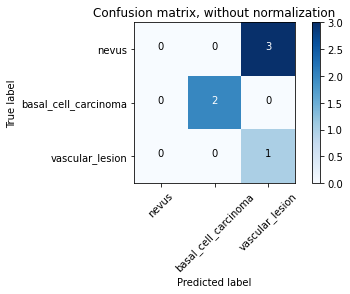

In [0]:
#first batch(10)
cnf_matrix = confusion_matrix(test_labels, y_pred,labels=['nevus','basal_cell_carcinoma','vascular_lesion'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nevus','basal_cell_carcinoma','vascular_lesion'],
                      title='Confusion matrix, without normalization')